### Load the libraries 

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Compose
import matplotlib.pyplot as plt
import numpy as np
import time 

### Prepare the Data 

In [2]:
train_dataset = datasets.CIFAR10(root='data/', download=False, train=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data/', download=False, train=False, transform=ToTensor())

In [7]:
X_train = train_dataset.data
y_train = np.array(train_dataset.targets)

X_test = test_dataset.data
y_test = np.array(test_dataset.targets)

#normalize the data for testing 
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

#reduce the range of the data to be between the range of 0.0 and 1.0 
X_train = (X_train/255) 
X_test = (X_test/255)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
train_size = len(X_train)
test_size = len(X_test)

X_train = X_train.reshape((train_size,32*32*3 ))
X_test = X_test.reshape((test_size, 32*32*3))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


**Subsample from the dataset** 

In [5]:
sample_training_size = 25000

X_train = np.array(X_train[0:sample_training_size])
y_train = np.array(y_train[0:sample_training_size])

sample_testing_size = 10000

X_test = np.array(X_test[0:sample_testing_size])
y_test = np.array(y_test[0:sample_testing_size])

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(25000, 3072) (10000, 3072)
(25000, 1) (10000, 1)


## KNN Classifer 

In [6]:
class KNearestNeighbor(): 

  def __init__(self, k): 
    super().__init__()
    self.k = k 

  def train(self, X, y): 
    self.X_train = X 
    self.y_train = y
  
  def test(self, X): 
    self.X_test = X 

    train_size = self.X_train.shape[0]
    test_size = self.X_test.shape[0] 

    dist_matrix = np.zeros((test_size, train_size)) 

    v1 = - 2 * np.dot(self.X_test, self.X_train.T) 
    v2 = np.sum(self.X_train**2, axis=1 )
    v3 = np.sum(self.X_test**2, axis = 1)[:, np.newaxis]  
    dist_matrix = (v1 + v2 + v3 ) ** .5

    self.dist_matrix = dist_matrix 

  def predictions(self):

    test_size = self.dist_matrix.shape[0]
    y_pred = np.array([]) 

    for i in range(test_size):
      sorted_dist = np.argsort(self.dist_matrix[i])
      k_nearest_dist = self.y_train[sorted_dist[:self.k]]

      #flatten into 1D Array 
      k_nearest_dist = np.ravel(k_nearest_dist)
      count = np.bincount(k_nearest_dist) 

      #Opt 1: Consistent Choice 
      most_freq=np.argmax(count)

      #Opt 2: randomly break tie 
      #total_ties = np.where(count == count.max())[0]
      #most_freq = np.random.choice(total_ties)

      y_pred = np.append(y_pred, most_freq)

    return y_pred.reshape(-1,1).astype(int)

  def predictions_detailed(self):
    print('detailed testing')

    test_size = self.dist_matrix.shape[0]

    y_pred = np.array([]) 

    for i in range(test_size): #O(N) 
  
      #sort the distances for each section 
      sorted_dist = np.argsort(self.dist_matrix[i])

      #take the k nearest neightbors based on the distance 
      
      k_nearest_dist = self.y_train[sorted_dist[:self.k]]
      k_nearest_dist = np.ravel(k_nearest_dist)

      #k_nearest = np.array(k_nearest_dist)
      print(f'k_nearest_dist: {k_nearest_dist}')
      #print(len(k_nearest))
      

      #assign the category based on the most frequent apperance 
      count = np.bincount(k_nearest_dist)
      print(f'count: {count}')

      #if there is a tie randomly select 
      #total_ties = np.where(count == count.max())[0]
      #most_freq = np.random.choice(total_ties)

      most_freq = np.argmax(count); 
      print(f'finding some random stuff: {np.where(count == count.max())[0]}')
      
      print(f'most frequent val: {most_freq}')
      y_pred = np.append(y_pred, most_freq)
      print()

   
    return y_pred.reshape(-1,1).astype(int)  


In [11]:
classes = train_dataset.classes

#to do 
#implment a return class value 
def overall_accuracy(y_pred, y_score): 
  total_pred = np.zeros(10)
  correct_pred = np.zeros(10)

  for label, prediction in zip(y_score, predictions):
    if label[0] == prediction[0]:
      correct_pred[label[0]] += 1 
    total_pred[label[0]] += 1 

  #overall accuracy 
  num_correct = np.sum(y_pred == y_score)
  overall_acc = float(num_correct) / y_score.shape[0]
  
  print(f'Accuracy {num_correct} / { y_score.shape[0]} correct: {overall_acc}')
  print('------------------------------------------------')
  # print accuracy for each class
  for i in range(10):
      accuracy = 100 * float(correct_pred[i]) / total_pred[i]
      print(f'Accuracy for {classes[i]} is {accuracy:.2f} %')

def subset_accuracy(y_pred, y_score): 
  pass 

Training the model for a subset 

In [9]:
print("Testing on subset of data")

model = KNearestNeighbor(5)
start_time = time.time()

print("Starting Training ")
print(f"training size: {X_train.shape[0]} testing size: {X_test.shape[0]}")
model.train(X_train, y_train) 
model.test(X_test)

total_time = time.time() - start_time 
print('Training completed in {:.0f}m {:.0f}s'.format(total_time // 60, total_time % 60))

Testing on subset of data
Starting Training 
training size: 50000 testing size: 10000
Training completed in 1m 25s


Model Predictions on test subset 

In [12]:
print('Inital results from subsampling \n')
predictions = model.predictions()  
overall_accuracy(predictions, y_test)

Inital results from subsampling 

Accuracy 3398 / 10000 correct: 0.3398
------------------------------------------------
Accuracy for airplane is 53.70 %
Accuracy for automobile is 20.50 %
Accuracy for bird is 45.20 %
Accuracy for cat is 21.70 %
Accuracy for deer is 51.40 %
Accuracy for dog is 22.00 %
Accuracy for frog is 24.80 %
Accuracy for horse is 21.00 %
Accuracy for ship is 65.50 %
Accuracy for truck is 14.00 %


## Testing Accuracy 

In [13]:
knn_values = [3,5,7,11] 

for item in knn_values: 

    print(f"Testing Accuracy for {item}")
    model = KNearestNeighbor(item)
    start_time = time.time()


    print(f"training size: {X_train.shape[0]} testing size: {X_test.shape[0]}")
    model.train(X_train, y_train) 
    model.test(X_test)

    total_time = time.time() - start_time 
    print('Training completed in {:.0f}m {:.0f}s'.format(total_time // 60, total_time % 60))
    
    predictions = model.predictions()  
    overall_accuracy(predictions, y_test)



Testing Accuracy for 3
training size: 50000 testing size: 10000
Training completed in 1m 43s
Accuracy 3303 / 10000 correct: 0.3303
------------------------------------------------
Accuracy for airplane is 57.30 %
Accuracy for automobile is 24.30 %
Accuracy for bird is 45.00 %
Accuracy for cat is 22.50 %
Accuracy for deer is 43.60 %
Accuracy for dog is 21.30 %
Accuracy for frog is 22.90 %
Accuracy for horse is 19.90 %
Accuracy for ship is 61.20 %
Accuracy for truck is 12.30 %
Testing Accuracy for 5
training size: 50000 testing size: 10000
Training completed in 1m 45s
Accuracy 3398 / 10000 correct: 0.3398
------------------------------------------------
Accuracy for airplane is 53.70 %
Accuracy for automobile is 20.50 %
Accuracy for bird is 45.20 %
Accuracy for cat is 21.70 %
Accuracy for deer is 51.40 %
Accuracy for dog is 22.00 %
Accuracy for frog is 24.80 %
Accuracy for horse is 21.00 %
Accuracy for ship is 65.50 %
Accuracy for truck is 14.00 %
Testing Accuracy for 7
training size: 50

## Cross Validation 

In [27]:
total_folds = 5
knn_values = [3,5,7,11]

print(X_train.shape)
print(y_train.shape)

X_train_fold = np.array_split(X_train, total_folds)
y_train_fold = np.array_split(y_train, total_folds)

print(len(X_train_fold))
print(len(y_train_fold[0]))

(50000, 3072)
(50000, 1)
5
10000


In [28]:
#assume already randomly ordered to begin with 

k_accuraces = []
subset_accuraces = [] 

print("Starting K-Fold Testing")
start_time = time.time() 
for k in knn_values: 
  
  current_k = []

  #print(f'Current K: {k}'); 
  for fold in range(total_folds):
    start_time = time.time()
    #print(f'Current fold: {fold}')

    X_train = []
    y_train = []
    
    for i in [x for x in range(total_folds) if x != fold]: 
      #temp_x = np.array(X_train_fold[x])
      #temp_y = np.array(y_train_fold[x])
      #print(f'temp x: {temp_x.shape}, temp y: {temp_y.shape}')
      
      X_train.append(X_train_fold[i])
      y_train.append(y_train_fold[i])

      #X_train = np.concatenate(temp_x)
      #y_train = np.concatenate(temp_y)
    
    #define training and test set 
    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    X_test = X_train_fold[fold]
    y_test = y_train_fold[fold]

    #define model 
    model = KNearestNeighbor(k)

    model.train(X_train, y_train) 
    model.test(X_test)

    #determine the accuracy 
    predictions = model.predictions()  

    num_correct = np.sum(predictions == y_test)
    overall_acc = float(num_correct) / y_test.shape[0]

    current_k.append(overall_acc)

    total_time = time.time() - start_time 
    print(f'K: {k:02d}, cv: {fold}, Runtime: {total_time//60:.0f}m {total_time % 60:.0f}s , Accuracy: {overall_acc}')
  
  #could define a subset of accuraries as well, but would take additional time


  k_accuraces.append(current_k)

total_time = time.time() - start_time 

print('KFold completed in {:.0f}m {:.0f}s'.format(total_time // 60, total_time % 60))

Starting K-Fold Testing
K: 03, cv: 0, Runtime: 1m 49s , Accuracy: 0.326
K: 03, cv: 1, Runtime: 1m 45s , Accuracy: 0.3261
K: 03, cv: 2, Runtime: 1m 30s , Accuracy: 0.328
K: 03, cv: 3, Runtime: 1m 36s , Accuracy: 0.3252
K: 03, cv: 4, Runtime: 1m 28s , Accuracy: 0.3178
K: 05, cv: 0, Runtime: 1m 35s , Accuracy: 0.335
K: 05, cv: 1, Runtime: 1m 29s , Accuracy: 0.3297
K: 05, cv: 2, Runtime: 1m 31s , Accuracy: 0.3336
K: 05, cv: 3, Runtime: 1m 29s , Accuracy: 0.334
K: 05, cv: 4, Runtime: 1m 37s , Accuracy: 0.3283
K: 07, cv: 0, Runtime: 1m 37s , Accuracy: 0.34
K: 07, cv: 1, Runtime: 1m 48s , Accuracy: 0.333
K: 07, cv: 2, Runtime: 1m 37s , Accuracy: 0.3356
K: 07, cv: 3, Runtime: 1m 39s , Accuracy: 0.331
K: 07, cv: 4, Runtime: 1m 33s , Accuracy: 0.3237
K: 11, cv: 0, Runtime: 1m 30s , Accuracy: 0.3381
K: 11, cv: 1, Runtime: 1m 36s , Accuracy: 0.3243
K: 11, cv: 2, Runtime: 1m 38s , Accuracy: 0.3307
K: 11, cv: 3, Runtime: 1m 33s , Accuracy: 0.3307
K: 11, cv: 4, Runtime: 1m 42s , Accuracy: 0.3232
KFol

In [29]:
print('Overall K-Fold Accuracies for each k-nearest neightbour')
print('')

overall_fold_accuracy = []


for index, data in enumerate(k_accuraces):
  overall_fold_accuracy.append(np.sum(data)/len(data))

for k, accuracy in zip(knn_values, overall_fold_accuracy): 
  print(f'k:{k:02d}, Overall Accuracy:{accuracy:.4f}')

Overall K-Fold Accuracies for each k-nearest neightbour

k:03, Overall Accuracy:0.3246
k:05, Overall Accuracy:0.3321
k:07, Overall Accuracy:0.3327
k:11, Overall Accuracy:0.3294


### Image Plots 

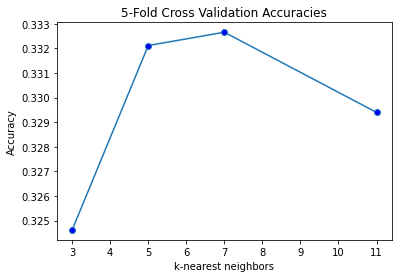

In [30]:
x_points = knn_values
y_points = overall_fold_accuracy

# plotting the points
plt.plot(x_points, y_points, marker='o', markerfacecolor='blue', markersize=6)

plt.xlabel('k-nearest neighbors')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation Accuracies')
 
# function to show the plot
plt.show()